In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plt
import seaborn as sns

In [2]:
space = pd.read_csv('D:\\space project\\Space_Corrected.csv')

In [3]:
space.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
space = space.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [5]:
space['Datum'] = pd.to_datetime(space['Datum'], format='mixed', dayfirst=True)
space['Datum'] = pd.to_datetime(space['Datum'], utc=True)


In [6]:
space['Year'] = space['Datum'].dt.year


In [7]:
space.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020


In [8]:
space["Country"] = space["Location"].apply(lambda location: location.split(", ")[-1])


In [9]:
space.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,USA


In [10]:
df_company = space['Company Name'].value_counts().reset_index().head(25)
df_company

,Company Name,count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


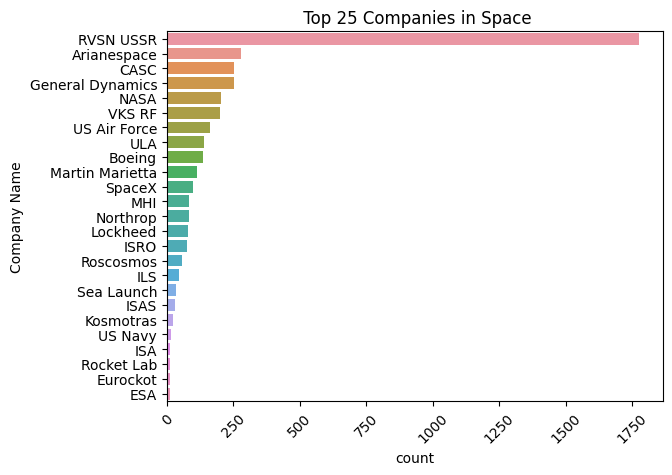

In [11]:
import matplotlib.pyplot as plt
sns.barplot(data=df_company,y='Company Name',x='count',orient='h')
plt.title(' Top 25 Companies in Space')
plt.xticks(rotation=45)
plt.show()

In [12]:
df_country = space['Country'].value_counts().reset_index().head(10)
df_country

,Country,count
0,Russia,1395
1,USA,1344
2,Kazakhstan,701
3,France,303
4,China,268
5,Japan,126
6,India,76
7,Pacific Ocean,36
8,New Zealand,13
9,Iran,13


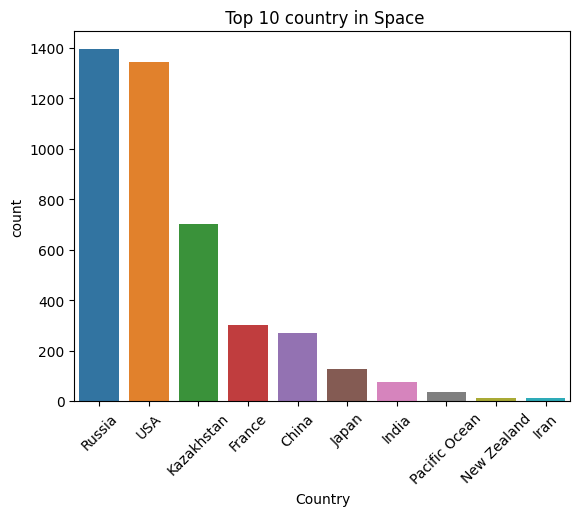

In [18]:
sns.barplot(data=df_country,x='Country',y='count')
plt.title(' Top 10 country in Space')
plt.xticks(rotation=45)
plt.show()

In [20]:
df_status = space['Status Mission'].value_counts().reset_index()
df_status

,Status Mission,count
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4
